In [1]:
import os
os.chdir('C:\\Users\\Alex\\PycharmProjects\\4YP\\')
os.getcwd()

'C:\\Users\\Alex\\PycharmProjects\\4YP'

In [ ]:
#No of epochs per stage of sleep and proportions across all patients.

In [ ]:
#Proportion of classifications where experts agree by patient.
import numpy as np
from preprocess import ISRUCPreprocessor
import matplotlib.pyplot as plt

pre = ISRUCPreprocessor(patient=7, lpf_cutoff = 30)
disagreements = pre.epochs.metadata["Sleep Stage"].isna()



Extracting EDF parameters from C:\Users\Alex\PycharmProjects\4YP\data\Raw\ISRUC\SubgroupIII\7\7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Adding metadata with 1 columns
814 matching events found
No baseline correction applied
0 projection items activated
Loading data for 814 events and 6001 original time points ...
1 bad epochs dropped
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 89 samples (0.445 s)

2000
2000
2000


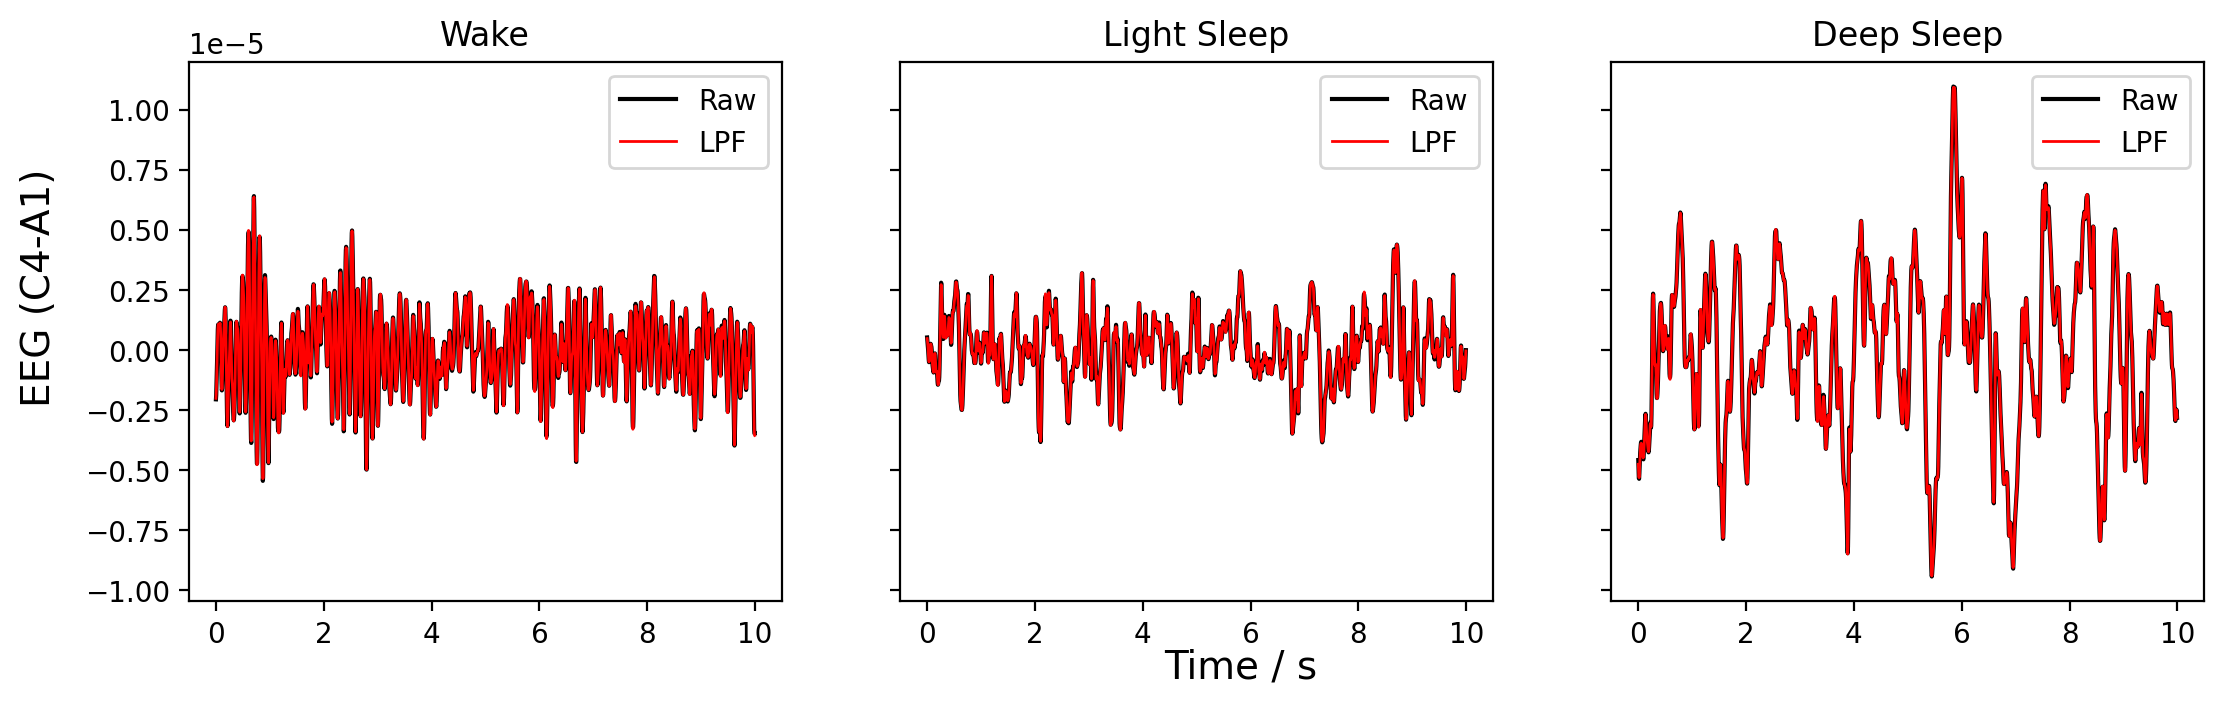

In [9]:
import numpy as np
from preprocess import ISRUCPreprocessor
import matplotlib.pyplot as plt

preprocessor = ISRUCPreprocessor(patient=7, lpf_cutoff = 30)

fig,axs = plt.subplots(1,3,figsize=(13,3.5),sharex=True, sharey=True)
epoch = [800,556,327]
lw = 1.5
fs = 12
# Raw, n3
for i in range(3):
    ax = axs[i]
    data = preprocessor.epochs.get_data()[epoch[i]][0]
    data = data[0:int(len(data) / 3)]
    sf = preprocessor.epochs.info["sfreq"]
    print(len(data))
    t = np.arange(0,len(data)/sf, 1/sf)
    ax.plot(t,data, linewidth=lw, label="Raw", color="black")
    ax.set_title(['Wake','Light Sleep','Deep Sleep'][i])

# LPFed
for i in range(3):
    ax = axs[i]
    lpf_data = preprocessor.lpf_epochs.get_data()[epoch[i]][0]
    lpf_data = lpf_data[0:int(len(lpf_data) / 3)]
    sf = preprocessor.lpf_epochs.info["sfreq"]
    t = np.arange(0,len(lpf_data)/sf, 1/sf)
    ax.plot(t, lpf_data, linewidth=lw-0.5, label="LPF", color="red")
    ax.legend()
fig.dpi = 200
fig.text(0.5,0,"Time / s", fontsize= fs+2)
fig.text(0.06,0.4,"EEG ("+str(preprocessor.params["channel"])+")", fontsize = fs+2, rotation = 90)

plt.show()

Extracting EDF parameters from C:\Users\Alex\PycharmProjects\4YP\data\Raw\ISRUC\SubgroupIII\7\7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Adding metadata with 1 columns
814 matching events found
No baseline correction applied
0 projection items activated
Loading data for 814 events and 6001 original time points ...
1 bad epochs dropped
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 89 samples (0.445 s)



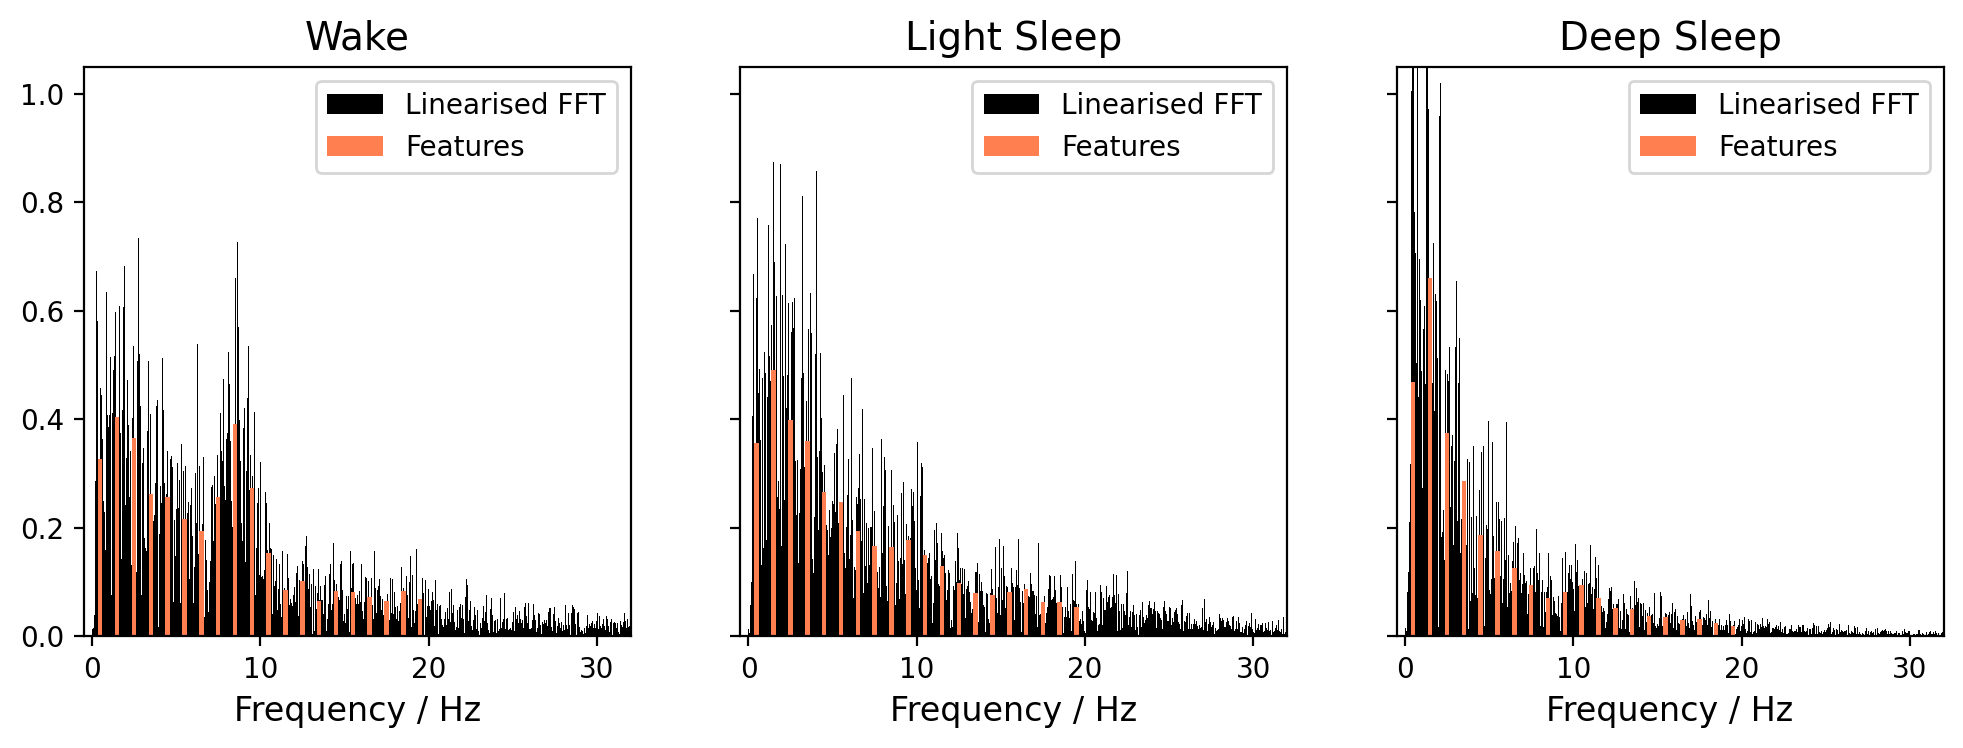

In [7]:
import numpy as np
from preprocess import ISRUCPreprocessor
import matplotlib.pyplot as plt

pre = ISRUCPreprocessor(patient=7)

fig,axs = plt.subplots(1,3,figsize=(12,3.7),sharex=True, sharey=True)
epoch = [800,556,327]
lw = 1.5
fs = 12

freqs, fft_data = pre.freqs, pre.fft_data
feature_freqs, features = pre.feature_freqs, pre.features
for i in range(3):
  #FFT
  ax =axs[i]
  epoch_fft_data = fft_data[epoch[i]][0]
  #ax.plot(freqs, fft_data, linewidth=lw, color='k')
  ax.bar(freqs, epoch_fft_data, width=freqs[1]-freqs[0], color='black', label='Linearised FFT')
  #Features
  epoch_features = features[epoch[i]][0]
  #ax.plot(feature_freqs, window_features, linewidth=lw, color='k')
  ax.bar(feature_freqs, epoch_features, width=0.27, color='coral', alpha=1, label='Features')
  ax.legend()
  ax.set_xlabel('Frequency / Hz', fontsize=fs)
  ax.set_title(['Wake','Light Sleep','Deep Sleep'][i], fontsize=fs+2)
  ax.set_xlim(-0.5,32)
  ax.set_ylim(0,1.05)
fig.dpi=200

Extracting EDF parameters from C:\Users\Alex\PycharmProjects\4YP\data\Raw\ISRUC\SubgroupIII\7\7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Adding metadata with 1 columns
814 matching events found
No baseline correction applied
0 projection items activated
Loading data for 814 events and 6001 original time points ...
1 bad epochs dropped
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 89 samples (0.445 s)



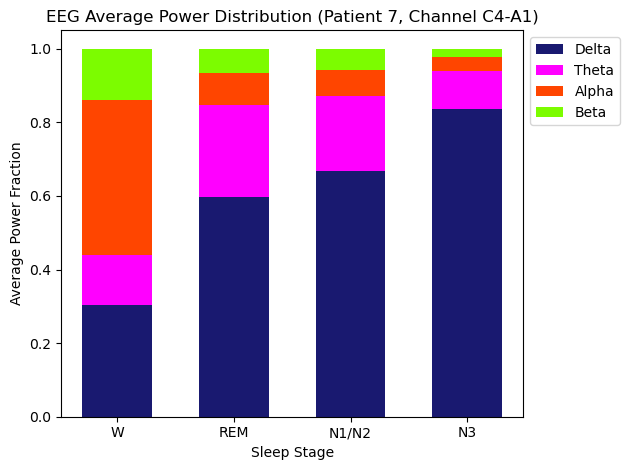

In [6]:

#Compare Power distribution by sleep stage
import numpy as np
import matplotlib.pyplot as plt
from preprocess import ISRUCPreprocessor

patient=7
channel="C4-A1"
pre = ISRUCPreprocessor(patient=patient, channel=channel)
avg_stage_power_fractions, power_fractions = pre.avg_stage_power_fractions, pre.power_fractions
# Assuming your avg_power_fractions looks something like this:
# avg_power_fractions = np.array([[0.1, 0.15, 0.12, 0.18], # Wake delta->beta
#                                [0.2, 0.25, 0.22, 0.28],
#                                [0.3, 0.35, 0.32, 0.38],
#                                [0.4, 0.45, 0.42, 0.48]]) #N3 delta->beta

# Bands and stages
bands = ["Delta", "Theta", "Alpha", "Beta"]
barstages = ["W", "REM", "N1/N2", "N3"]

# Creating the stacked bar plot
bar_width = 0.6
x = np.arange(len(barstages))

bottoms = np.zeros(len(barstages))

for i in range(len(bands)):
    plt.bar(x, avg_stage_power_fractions[i], bar_width, label=bands[i], bottom=bottoms, color=['midnightblue', 'magenta','orangered','lawngreen'][i])
    bottoms += avg_stage_power_fractions[i]

plt.xlabel('Sleep Stage')
plt.ylabel('Average Power Fraction')
plt.title('EEG Average Power Distribution (Patient '+str(patient)+', Channel '+str(channel)+')')
plt.xticks(x, barstages)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()


Extracting EDF parameters from C:\Users\Alex\PycharmProjects\4YP\data\Raw\ISRUC\SubgroupIII\7\7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Adding metadata with 1 columns
814 matching events found
No baseline correction applied
0 projection items activated
Loading data for 814 events and 6001 original time points ...
1 bad epochs dropped
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 89 samples (0.445 s)



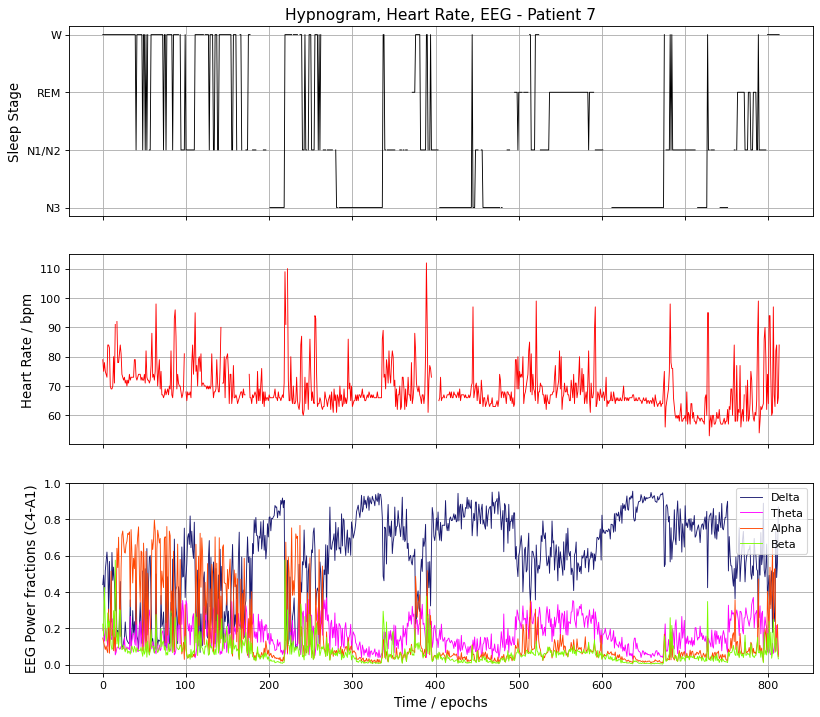

In [10]:
import numpy as np
from preprocess import ISRUCPreprocessor

#Plot Power fractions over time
#load data
patient=7
channel = "C4-A1"
pre = ISRUCPreprocessor(patient=patient, channel=channel)
avg_stage_power_fractions, power_fractions = pre.avg_stage_power_fractions, pre.power_fractions
length = len(power_fractions[0])

time, stage = pre.time, pre.stage
heart_rate = pre.heart_rate
#Plots
fig, axs = plt.subplots(3,1,figsize=(12,10.5), sharex=True)
lw=0.8
fs=12
#if xunits=="e":
xlabel = "Time / epochs"
#elif xunits=="h":
#xlabel = "Time / hrs"
#elif xunits=="s":
#xlabel = "Time / s"

ax=axs[0]
ax.plot(time,stage,linewidth=lw, color='black')
ax.grid(True,)
ax.set_ylabel('Sleep Stage', fontsize=fs)
yticklabels = ['N3','N1/N2','REM','W']
yticks = [0,1,2,3]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_title('Hypnogram, Heart Rate, EEG - Patient '+str(patient),fontsize=fs+2)

ax=axs[1]
ax.grid(True)
ax.plot(time, heart_rate, linewidth=lw, color='red')
#ax.set_xlabel(xlabel, fontsize=fs)
ax.set_ylabel('Heart Rate / bpm', fontsize=fs)

ax=axs[2]
ax.grid(True)
for i in range(4):
  ax.plot(power_fractions[i], linewidth=0.8, color=['midnightblue', 'magenta','orangered','lawngreen'][i], label=['Delta','Theta','Alpha','Beta'][i])
  ax.set_xlabel(xlabel, fontsize=fs)
  ax.set_ylabel('EEG Power fractions ('+channel+')', fontsize=fs)
  ax.legend()

fig.dpi=80